# Modularity Formula

Modularity is a quantitative metric used to evaluate the strength of a network's division into modules (or communities). It measures how well the network is partitioned by comparing the density of edges within communities to the expected density of such edges in a randomized network that preserves the original degree distribution. The formula for modularity is given below.

$$Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)$$

Where:
* $m$: Total number of edges in the graph (sum of all edge weights for a weighted graph).
* $A_{ij}$: Element of the adjacency matrix, representing the weight of the edge between node $i$ and node $j$ (0 if no edge).
* $k_i$: Degree of node $i$ (sum of weights of edges connected to node $i$).
* $k_j$: Degree of node $j$.
* $\delta(c_i, c_j)$: Kronecker delta function, which is 1 if node $i$ and node $j$ belong to the same community ($c_i = c_j$), and 0 otherwise.

### Example Graph

Let's use a simple graph with two 3-node cliques connected by a single edge. This graph has a clear, intuitive community structure.

* **Nodes:** $V = \{1, 2, 3, 4, 5, 6\}$
* **Edges:** $E = \{(1, 2), (1, 3), (2, 3), (4, 5), (4, 6), (5, 6)\}$
* **Total Edges ($m$):** $m = 6$
* **Node Degrees ($k_i$):** $k_1=k_2=k_3=k_4=k_5=k_6=2$

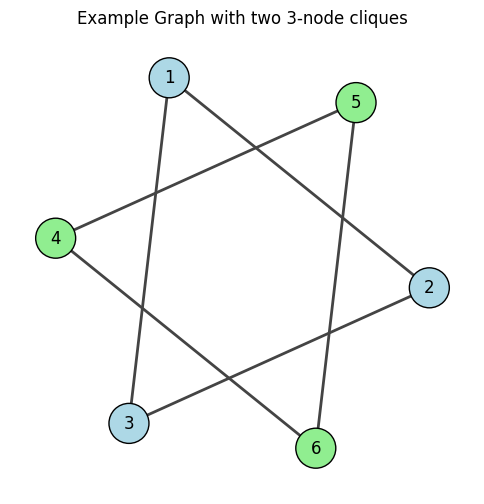

In [1]:
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph()
g.add_vertices(6)
g.add_edges([(0, 1), (0, 2), (1, 2), (3, 4), (3, 5), (4, 5)])

fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=40,
    vertex_color=['lightblue'] * 3 + ['lightgreen'] * 3,
    vertex_label=[f'{i+1}' for i in range(6)],
    layout='kamada_kawai'
)
ax.set_title("Example Graph with two 3-node cliques")
plt.show()

### Partitioning the Graph

We will now evaluate two different partitions to see how modularity scores differ.

#### "Good" Partitioning ($P_{good}$)

This partition correctly identifies the two cliques.

* **Community 1:** $C_1 = \{1, 2, 3\}$
* **Community 2:** $C_2 = \{4, 5, 6\}$

#### "Bad" Partitioning ($P_{bad}$)

This partition incorrectly splits a clique and merges nodes from both communities.

* **Community 1:** $C_1 = \{1, 2, 4\}$
* **Community 2:** $C_2 = \{3, 5, 6\}$

### Modularity Computation

The term $\frac{k_i k_j}{2m}$ will be constant for all pairs, since all nodes have a degree of 2.

$\frac{k_i k_j}{2m} = \frac{2 \cdot 2}{2 \cdot 6} = \frac{4}{12} = \frac{1}{3}$

#### Adjacency Matrix ($A_{ij}$)

The adjacency matrix for this graph is:

$$
A = \begin{pmatrix}
0 & 1 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 1 & 1 & 0
\end{pmatrix}
$$

The calculation will involve summing over all pairs of nodes $(i, j)$ that are in the same community.



### 1. Computation for "Good" Partitioning ($P_{good}$)

* **Community 1 ($C_1 = \{1, 2, 3\}$):**
* **Community 2 ($C_2 = \{4, 5, 6\}$):**

The calculation is split into two sums, one for each community.

**Sum for Community 1:** We sum for all pairs $(i, j)$ where $i, j \in \{1, 2, 3\}$.
* $\sum_{i,j \in C_1} A_{ij}$: There are 6 edges in this 3-node clique (when summing over ordered pairs).
* $\sum_{i,j \in C_1} \frac{k_i k_j}{2m}$: The term $\frac{k_i k_j}{2m}$ is $\frac{1}{3}$ for all pairs. There are $3 \times 3 = 9$ pairs in the community. The sum is $9 \times \frac{1}{3} = 3$.
* Sum for $C_1$: $6 - 3 = 3$.

**Sum for Community 2:** The calculation is identical to Community 1.
* Sum for $C_2$: $6 - 3 = 3$.

**Total Sum:**
$ \sum_{i,j} \left[A_{ij} - \frac{k_i k_j}{2m}\right] \delta(c_i, c_j) = (\text{Sum for } C_1) + (\text{Sum for } C_2) = 3 + 3 = 6$.

**Final Modularity ($Q_{good}$):**
$Q_{good} = \frac{1}{2m} \times (\text{Total Sum}) = \frac{1}{12} \times 6 = \mathbf{0.5}$



### 2. Computation for "Bad" Partitioning ($P_{bad}$)

* **Community 1 ($C_1 = \{1, 2, 4\}$):**
* **Community 2 ($C_2 = \{3, 5, 6\}$):**

**Sum for Community 1:** We sum for all pairs $(i, j)$ where $i, j \in \{1, 2, 4\}$.
* $\sum_{i,j \in C_1} A_{ij}$: There is only one edge, $(1,2)$. Summing over ordered pairs, this is $2$.
* $\sum_{i,j \in C_1} \frac{k_i k_j}{2m}$: There are 9 pairs. The sum is $9 \times \frac{1}{3} = 3$.
* Sum for $C_1$: $2 - 3 = -1$.

**Sum for Community 2:** The calculation is identical.
* $\sum_{i,j \in C_2} A_{ij}$: There is only one edge, $(5,6)$. Summing over ordered pairs, this is $2$.
* $\sum_{i,j \in C_2} \frac{k_i k_j}{2m}$: There are 9 pairs. The sum is $9 \times \frac{1}{3} = 3$.
* Sum for $C_2$: $2 - 3 = -1$.

**Total Sum:**
$ \sum_{i,j} \left[A_{ij} - \frac{k_i k_j}{2m}\right] \delta(c_i, c_j) = (\text{Sum for } C_1) + (\text{Sum for } C_2) = -1 + (-1) = -2$.

**Final Modularity ($Q_{bad}$):**
$Q_{bad} = \frac{1}{2m} \times (\text{Total Sum}) = \frac{1}{12} \times (-2) \approx \mathbf{-0.167}$


*Note:* Based on our previous analysis, the "good" partitioning yields a significantly higher modularity score. It is important to note, however, that a high modularity score is not always a definitive indicator of a better community partitioning, as was previously demonstrated with the Grid Graph [here](test_significance_of_community.ipynb).